In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\AliOs\Downloads\bbc_text_cls.csv",encoding='latin1',)

(array([510.,   0., 386.,   0.,   0., 417.,   0., 511.,   0., 401.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

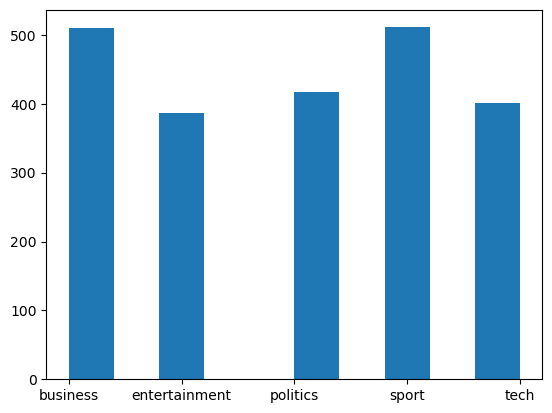

In [2]:
import matplotlib.pyplot as plt 
plt.hist(df[['labels']])

In [13]:
lip=[]
i=0
indnewham=[]
for idx,one in enumerate(df['v1']):
    if one=='ham':
        lip.append(idx)
    
    

        

In [14]:
lip

[0,
 1,
 3,
 4,
 6,
 7,
 10,
 13,
 14,
 16,
 17,
 18,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 55,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 66,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 94,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 114,
 115,
 117,
 118,
 121,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 135,
 136,
 137,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 160,
 161,
 162,
 165,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 188,
 189,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 21

In [23]:
newdf=df.loc[df['v1']=='ham'][0:1000]

In [24]:
newdf=pd.concat([newdf,df.loc[df['v1']=='spam']],axis=0)

In [25]:
newdf

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
...,...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,NaN,NaN,NaN
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,NaN,NaN,NaN
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,NaN,NaN,NaN
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer()


In [4]:
pop=vectorizer.fit_transform(df['text'])

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['label'] = label_encoder.fit_transform(df['labels'])


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(pop,df['label'],test_size=0.3,random_state=42)

In [7]:
from tensorflow.keras.utils import to_categorical

y_train=to_categorical(y_train,num_classes=5)
y_test=to_categorical(y_test,num_classes=5)

In [8]:
X_train.shape

(1557, 29421)

In [9]:
len(y_train)

1557

In [10]:
from tensorflow.keras import Input,Model
input=Input(shape=(X_train.shape[1],))

In [11]:
from tensorflow.keras.layers import Dense
layer=Dense(1000)(input)
layer=Dense(1000)(layer)
layer=Dense(1000,activation='relu')(layer)
layer=Dense(5,activation='softmax')(layer)



In [12]:
model=Model(input,layer)

In [13]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 29421)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │    29,422,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1000)           │     1,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │     1,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         5,005 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,429,005 (119.89 MB)

 Trainable params: 31,429,005 (119.89 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from tensorflow.keras.losses import categorical_crossentropy
model.compile(
    optimizer='adam',
    loss=categorical_crossentropy,
    metrics=['accuracy']
    
)

In [15]:
from tensorflow.keras.utils import to_categorical
X_train.shape

(1557, 29421)

In [16]:
import numpy as np
r=model.fit(
    X_train, np.array(y_train),
    validation_data=(X_test, np.array(y_test)),
    batch_size=200,
    epochs=10,
    
)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 994ms/step - accuracy: 0.5708 - loss: 1.3380 - val_accuracy: 0.9716 - val_loss: 0.1305
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 997ms/step - accuracy: 0.9945 - loss: 0.0266 - val_accuracy: 0.9701 - val_loss: 0.1356
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9997 - loss: 3.4880e-04 - val_accuracy: 0.9656 - val_loss: 0.2411
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 945ms/step - accuracy: 1.0000 - loss: 1.5461e-04 - val_accuracy: 0.9626 - val_loss: 0.3542
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 928ms/step - accuracy: 1.0000 - loss: 1.0198e-06 - val_accuracy: 0.9641 - val_loss: 0.3318
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 930ms/step - accuracy: 1.0000 - loss: 5.7011e-08 - val_accuracy: 0.9671 - val_loss: 0.3444
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 940ms/step - accuracy: 1.0000 - loss: 7.3074e-08 - val_accuracy: 0.9686 - val_loss: 0.3553
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 1.0000 - loss: 5.0268e-08 - val_accura

In [17]:

np.argmax(model.predict(X_test[2]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


3

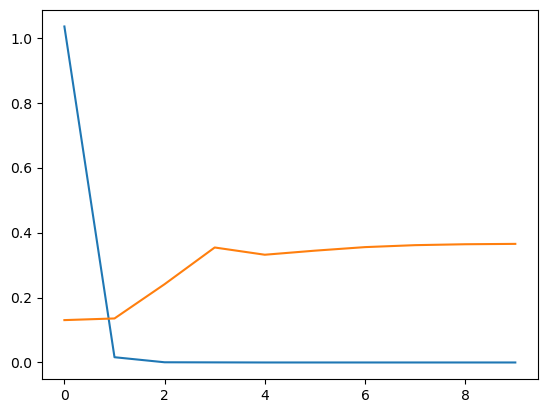

In [21]:
import matplotlib.pyplot as plt 
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

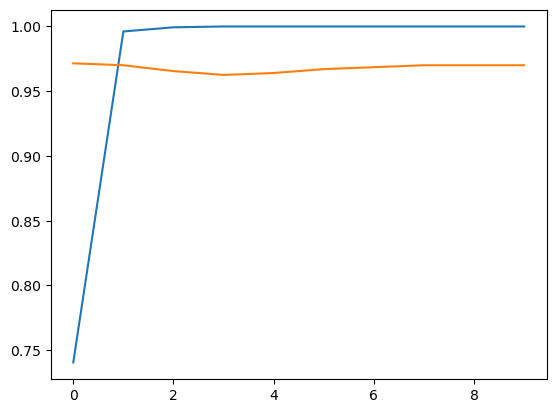

In [22]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])

In [23]:
sample=['i am not a man i am not a god i am worse',
       'aim for the moon and maybe youll land on a start',
        'the very substance of the ambitious is merly the shadow of a dream'
       ]

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer

pop=Tokenizer(num_words=None,
)

In [26]:
lpo=pop.fit_on_texts(sample)

In [30]:
so=pop.texts_to_sequences(sample)

In [37]:
from tensorflow.keras.utils import pad_sequences

pad_sequences(so,maxlen=5,truncating='post')
#with post cuts out the ends
#without cuts out the beginningsNLP

array([[ 3,  4,  5,  1,  7],
       [10, 11,  2, 12, 13],
       [ 2, 19, 20,  6,  2]])